In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X,y=make_classification(n_samples=1000,n_features=20,n_classes=2,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
def create_dropout_model(dropout_rate=0.2):
    model=Sequential([
        Dense(64,input_shape=(X_train.shape[1],),activation='relu'),
        Dropout(dropout_rate),
        Dense(32,activation='relu'),
        Dropout(dropout_rate),
        Dense(1,activation='sigmoid')
    ])
    return model
dropout_model=create_dropout_model(dropout_rate=0.2)
dropout_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
dropout_history=dropout_model.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_test,y_test),verbose=0)

In [2]:
def create_gradient_clip_model(clip_norm=1.0):
    model = Sequential([
        Dense(64, input_shape=(X_train.shape[1],), activation ='relu'),
        Dense(32, activation ='relu'),
        Dense(1, activation ='sigmoid')
    ])
    optimizer=Adam(clipnorm=clip_norm)
    model.compile(optimizer=optimizer,loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model
gradient_clip_model=create_gradient_clip_model(clip_norm=1.0)
gradient_clip_history=gradient_clip_model.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6006 - accuracy: 0.7150 - val_loss: 0.5303 - val_accuracy: 0.7700
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.8350 - val_loss: 0.4390 - val_accuracy: 0.8150
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3621 - accuracy: 0.8600 - val_loss: 0.3982 - val_accuracy: 0.8350
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8800 - val_loss: 0.3806 - val_accuracy: 0.8400
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2970 - accuracy: 0.8850 - val_loss: 0.3753 - val_accuracy: 0.8350
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2859 - accuracy: 0.8975 - val_loss: 0.3740 - val_accuracy: 0.8400
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2732 - accuracy: 0.8975 - val_loss: 0.3680 - val_accuracy: 0.8450
Epoch 8/50
25/25 [==

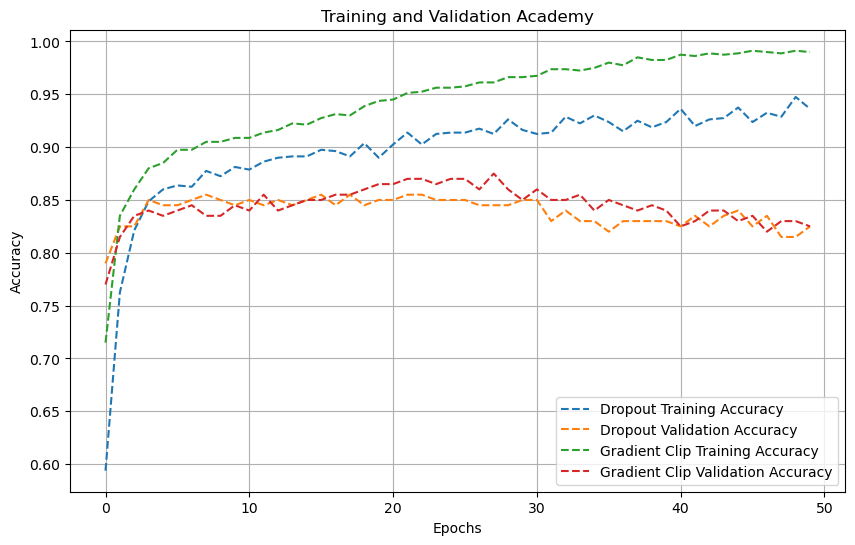

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(dropout_history.history['accuracy'],label='Dropout Training Accuracy',linestyle='--')
plt.plot(dropout_history.history['val_accuracy'],label='Dropout Validation Accuracy',linestyle='--')
plt.plot(gradient_clip_history.history['accuracy'],label='Gradient Clip Training Accuracy',linestyle='--')
plt.plot(gradient_clip_history.history['val_accuracy'],label='Gradient Clip Validation Accuracy',linestyle='--')
plt.title('Training and Validation Academy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

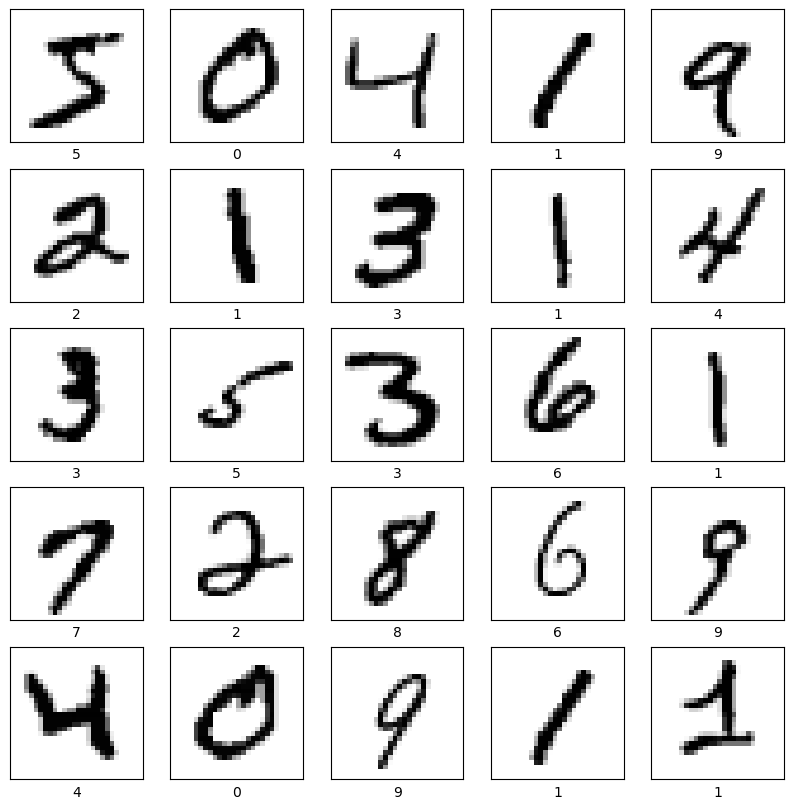

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4430 - dense_10_loss: 0.2925 - dense_11_loss: 0.1505 - dense_10_accuracy: 0.9160 - dense_11_accuracy: 0.9434 - val_loss: 0.2632 - val_dense_10_loss: 0.1716 - val_dense_11_loss: 0.0916 - val_dense_10_accuracy: 0.9532 - val_dense_11_accuracy: 0.9668
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2035 - dense_10_loss: 0.1309 - dense_11_loss: 0.0726 - dense_10_accuracy: 0.9617 - dense_11_accuracy: 0.9748 - val_loss: 0.1932 - val_dense_10_loss: 0.1176 - val_dense_11_loss: 0.0756 - val_dense_10_accuracy: 0.9655 - val_dense_11_accuracy: 0.9732
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1428 - dense_10_loss: 0.0897 - dense_11_loss: 0.0531 - dense_10_accuracy: 0.9736 - dense_11_accuracy: 0.9819 - val_loss: 0.1634 - val_dense_10_loss: 0.1029 - val_dense_11_loss: 0.0605 - val_dense_10_accuracy: 0.9697 - val_dense_11_accuracy: 0.9808
Epoch 4/20
1500/1500 [

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_parity = np.array([np.sum(np.array(list(map(int, str(y))))) % 2 for y in y_train])
y_test_parity = np.array([np.sum(np.array(list(map(int, str(y))))) % 2 for y in y_test])
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

inputs = keras.Input(shape=(28, 28))
x = layers.Flatten()(inputs)
x = layers.Dense(128, activation='relu')(x)
outputs_digits = layers.Dense(10, activation='softmax')(x)
outputs_parity = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=[outputs_digits, outputs_parity])
inputs = keras.Input(shape=(28, 28))
x = layers.Flatten()(inputs)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)
outputs_parity = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=[outputs, outputs_parity])
model.compile(
    optimizer='adam',
    loss=['sparse_categorical_crossentropy', 'binary_crossentropy'],
    metrics=[['accuracy'], ['accuracy']]
)

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
history = model.fit(
    x_train,
    [y_train, y_train_parity],
    epochs=20,
    validation_split=0.2,
    callbacks=[early_stopping]
)

